In [1]:
%matplotlib inline
import random
import torch
import numpy
from d2l import torch as d2l

## 生成数据集

In [2]:
def synthetic_data(w, b, num_examples): 
    '''生成y=wx+b''' 
    X=torch.normal(0,1,(num_examples, len(w)))
    y=torch.matmul(X, w)+b 
    y+=torch.normal(0,0.01, y.shape)
    return X, y.reshape((-1, 1)) 

true_w=torch.tensor([2, -3.4])
true_b=4.2 
features, labels = synthetic_data(true_w, true_b, 1000)

In [3]:
print('features:', features[0], '\nlabels:', labels[1])

features: tensor([ 2.5378, -0.9249]) 
labels: tensor([7.1602])


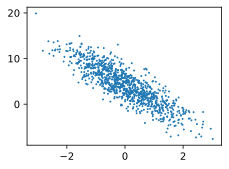

In [4]:
d2l.set_figsize()
d2l.plt.scatter(features[:, (1)].detach().numpy(), labels.detach().numpy(), 1);
d2l.plt.show()

## 读取数据集

In [5]:
def data_iter(batch_size, features, labels): 
    num_examples=len(features) 
    indices=list(range(num_examples)) 
    #打乱样本
    random.shuffle(indices) 
    for i in range (0, num_examples, batch_size): 
        batch_indices=torch.tensor(
            indices[i : min(i+batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [6]:
batch_size=10 

for X, y in data_iter(batch_size, features, labels): 
    print(X, '\n', y) 
    break

tensor([[ 1.1659,  0.1306],
        [-0.6870, -0.3265],
        [ 1.0928, -0.0873],
        [-0.6127, -0.2420],
        [ 0.3241,  2.4236],
        [-0.8580, -0.4914],
        [-1.3763, -0.3605],
        [ 0.4061, -1.1151],
        [-0.7410, -0.9037],
        [ 1.0380, -0.3243]]) 
 tensor([[ 6.0931],
        [ 3.9341],
        [ 6.6640],
        [ 3.8161],
        [-3.3889],
        [ 4.1459],
        [ 2.6745],
        [ 8.8176],
        [ 5.7837],
        [ 7.3824]])


## 初始化模型参数

In [7]:
w=torch.normal(0, 0.01, size=(2,1), requires_grad=True) 
b=torch.zeros(1, requires_grad=True)

## 定义模型

In [8]:
def linreg(X, w, b): 
    '''线性回归模型'''
    return torch.matmul(X, w)+b

In [9]:
def squared_loss(y_hat, y): 
    '''均方损失函数''' 
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [10]:
def sgd(params, lr, batch_size): 
    '''小批量梯度下降算法''' 
    with torch.no_grad(): 
        for param in params: 
            param -= lr*param.grad / batch_size 
            param.grad.zero_()

## 训练模型

In [11]:
lr=0.5
num_epochs=10
net=linreg 
loss=squared_loss 

In [12]:
for epoch in range(num_epochs): 
    for X, y in data_iter(batch_size, features, labels): 
        l=loss(net(X, w, b), y) 
        l.sum().backward() 
        sgd([w, b], lr, batch_size)
    with torch.no_grad(): 
        train_l=loss(net(features, w, b), labels) 
        print(f'epoch {epoch+1}, loss{float(train_l.mean()):f}')

epoch 1, loss0.000058
epoch 2, loss0.000054
epoch 3, loss0.000052
epoch 4, loss0.000063
epoch 5, loss0.000053
epoch 6, loss0.000062
epoch 7, loss0.000052
epoch 8, loss0.000063
epoch 9, loss0.000063
epoch 10, loss0.000055


In [13]:
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

w的估计误差: tensor([0.0006, 0.0016], grad_fn=<SubBackward0>)
b的估计误差: tensor([0.0022], grad_fn=<RsubBackward1>)
